# Практическое задание 5
## Вариант 3
## Задание 1 

*Максимальная оценка задания: **1** балла*

Дан набор точек **D**:

|      | 0    | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    |
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
|**x**|19.3|30.4|22.5|37.4|19.7|15.7|32.8|29.5|33|17.2|
|**y**|19.5|23.7|24.1|25.1|26.2|30.3|24|19.5|23|24.6|

Количество кластеров k = **2**

Начальные средние значения (центры кластеров) M = **[(19, 26), (33, 29)]**

Порог сходимости ε = **0.01**

1.1 *Самостоятельно* реализуйте алгоритм **KMeans** для двумерных данных. Вычислите кластеры и их центры. 

Оформите этот пункт в виде функции. Функция должна возвращать найденные кластеры и новые центры кластеров. Каждый кластер должен содержать индексы точек, которые принадлежат этому кластеру

1.2 Постройте диаграмму рассеяния, на которой будут отображены все точки, их принадлежность кластеру, центры кластеров. 

Оформите этот пункт в виде функции. Принадлежность кластеру отобразить цветом точки. Все точки подписать. Точки центров кластеров выделить

1.3 Воспользуйтесь алгоритмом **KMeans** из библиотеки **sklearn** и выведите результат его работы. Сравните результаты собственной и библиотечной реализации

1.4 К исходным данным добавьте точку **(-10, 25)** и повторно вычислите кластеры и их центры. Также постройте диаграмму рассеяния


In [1]:
from math import sqrt, exp, pi
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

In [2]:
#1.1
def kMeans(xy,M):
    M1=[]
    M2=[]
    lastM1=[]
    lastM2=[]
    lastM=[[0,0],[0,0]] 
    check=100
    l=0
   
    while check>=0.01 and lastM!=M:
        lastM=[row[:] for row in M]
        lastM1=[row[:] for row in M1]
        lastM2=[row[:] for row in M2]
        M1.clear()
        M2.clear()
        sm=0
        sm1=0
        for i in range(0,len(xy)):
            p=sqrt(((xy[i][0]-M[0][0])**2)+((xy[i][1]-M[0][1])**2))
            p1=sqrt(((xy[i][0]-M[1][0])**2)+((xy[i][1]-M[1][1])**2))
            if p<p1:
                M1.append(xy[i])
            else:
                M2.append(xy[i])
        if len(M2)==0 or len(M1)==0:
            M1=[row[:] for row in lastM1]
            M2=[row[:] for row in lastM2]
            M=[row[:] for row in lastM]
        else:
            for i in range (0,len(M1)):
                sm+=M1[i][0]
                sm1+=M1[i][1]
            M[0][0]=sm/len(M1)
            M[0][1]=sm1/len(M1)
            sm=0
            sm1=0
            for i in range (0,len(M2)):
                sm+=M2[i][0]
                sm1+=M2[i][1]
            M[1][0]=sm/len(M2)
            M[1][1]=sm1/len(M2)
        check=0
        for i in range(0,2):
            for j in range (0,2):
                check+=(M[i][j]-lastM[i][j])**2
       
    return M, M1, M2
       


In [3]:
xy=[[19.3,19.5],[30.4,23.7],[22.5,24.1],[37.4,25.1],[19.7,26.2],[15.7,30.3],[32.8,24],[29.5,19.5],[33,23],[17.2,24.6]]
M=[[19,26],[33,29]]
print('Source data D = ', xy, '\nClusters count: ',2, '\nInit centers: U_init = ',M, '\nEpsilon: ',0.01)
M, M1, M2 =kMeans(xy,M)
#print(M1, M2)
#print(M)
clusters=[[],[]]
k=0
n=0

while k+n< len(xy):
    if M1[k]==xy[k+n]:
        clusters[0].append(k+n)
        k+=1     
    else:
        clusters[1].append(k+n)
        n+=1
print('Clusters: ', clusters,'\nNew centers: ',M)
    

Source data D =  [[19.3, 19.5], [30.4, 23.7], [22.5, 24.1], [37.4, 25.1], [19.7, 26.2], [15.7, 30.3], [32.8, 24], [29.5, 19.5], [33, 23], [17.2, 24.6]] 
Clusters count:  2 
Init centers: U_init =  [[19, 26], [33, 29]] 
Epsilon:  0.01
Clusters:  [[0, 2, 4, 5, 9], [1, 3, 6, 7, 8]] 
New centers:  [[18.880000000000003, 24.939999999999998], [32.62, 23.06]]


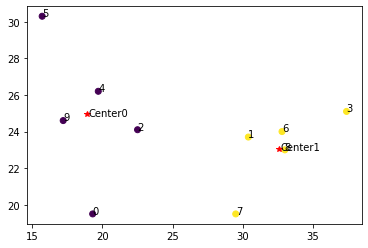

In [11]:
#1.2

x=[19.3,30.4,22.5,37.4,19.7,15.7,32.8,29.5,33,17.2]
y=[19.5,23.7,24.1,25.1,26.2,30.3,24,19.5,23,24.6]


fig, ax = plt.subplots()
for i,coordinate in enumerate(M):
    ax.plot(coordinate[0],coordinate[1],'r*')
    ax.text(coordinate[0]+0.1,coordinate[1]-0.1,'Center'+str(i))
labels_=[0]*len(x)
for index in clusters[1]:
    labels_[index]=1
for cluster in clusters:
    for index in cluster:
        ax.text(x[index],y[index],index)
scatter = ax.scatter(x,y,c=labels_)
    
plt.show()


In [ ]:
#1.3
kmeans = KMeans(n_clusters=2) 
kmeans.fit(xy)
print("KMean labels: ",kmeans.labels_)
print("KMean cluster centers:\n",kmeans.cluster_centers_)


Clusters:  [[0, 2, 4, 5, 9, 10], [1, 3, 6, 7, 8]] 
New centers:  [[14.066666666666668, 24.95], [32.62, 23.06]]


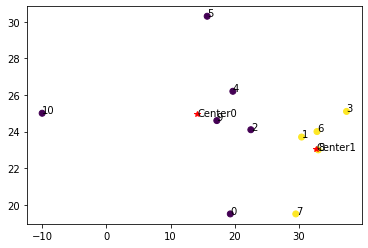

In [12]:
#1.4
xy.append([-10, 25])
M=[[19, 26], [33, 29]]
M, M1, M2 =kMeans(xy,M)
clusters=[[],[]]
k=0
n=0

while k+n< len(xy):
    if M1[k]==xy[k+n]:
        clusters[0].append(k+n)
        k+=1     
    else:
        clusters[1].append(k+n)
        n+=1
print('Clusters: ', clusters,'\nNew centers: ',M)
x=[19.3,30.4,22.5,37.4,19.7,15.7,32.8,29.5,33,17.2,-10]
y=[19.5,23.7,24.1,25.1,26.2,30.3,24,19.5,23,24.6,25]
fig, ax = plt.subplots()
for i,coordinate in enumerate(M):
    ax.plot(coordinate[0],coordinate[1],'r*')
    ax.text(coordinate[0]+0.1,coordinate[1]-0.1,'Center'+str(i))
labels_=[0]*len(x)
for index in clusters[1]:
    labels_[index]=1
for cluster in clusters:
    for index in cluster:
        ax.text(x[index],y[index],index)
scatter = ax.scatter(x,y,c=labels_)
    
plt.show()


## Задание 2

*Максимальная оценка задания: **1** балл*

Дан набор значений **X** и вероятностей их принадлежности к кластерам *C<sub>1</sub>* и *C<sub>2</sub>*:

| *x*  | *P(C<sub>1</sub>\|x)* | *P(C<sub>2</sub>\|x)* |
| ---- | --------------------- | --------------------- |
|14.4|1|0|
|14.2|1|0|
|25.9|0|1|
|26.7|0|1|
|11.4|1|0|
|20.2|0.2|0.8|
|17.1|0.7|0.3|
|13.5|1|0|
|11.8|1|0|
|18.9|0.4|0.6|

2.1 Найдите оценку максимального правдоподобия для средних μ<sub>1</sub> и μ<sub>2</sub>

2.2 Пусть μ<sub>1</sub> = **16**, μ<sub>2</sub> = **20.4** и σ<sub>1</sub> = **2.5**, σ<sub>2</sub> = **2.1**. Априорные вероятности каждого кластера P(*C<sub>1</sub>*) = **0.5**, P(*C<sub>2</sub>*) = **0.5**.

Найдите вероятности принадлежности точки x = **19** к кластерам *C<sub>1</sub>* и *C<sub>2</sub>*

In [13]:
x=[14.4,14.2,25.9,26.7,11.4,20.2,17.1,13.5,11.8,18.9]
P_C1=[1,1,0,0,1,0.2,0.7,1,1,0.4]
P_C2=[0,0,1,1,0,0.8,0.3,0,0,0.6]
print('Source data x:',x)
print('P(Ci|x):', P_C1, P_C2)

Source data x: [14.4, 14.2, 25.9, 26.7, 11.4, 20.2, 17.1, 13.5, 11.8, 18.9]
P(Ci|x): [1, 1, 0, 0, 1, 0.2, 0.7, 1, 1, 0.4] [0, 0, 1, 1, 0, 0.8, 0.3, 0, 0, 0.6]


In [19]:
#2.1
w1=0
w2=0

for i in range(0, len(x)):
    w1+=P_C1[i]*x[i]
    w2+=P_C2[i]*x[i]
u1=w1/np.sum(P_C1)
u2=w2/np.sum(P_C2)
print("Result u1 and u2: ", u1,' ', u2)



Result u1 and u2:  14.106349206349202   23.035135135135132


In [ ]:
u1=16
u2=20.4
σ1=2.5
σ2=2.1
P_C=[0.5,0.5]
x=19
print("New point value:",x,"\nSource u1 and u2:", u1,u2,"\nSource σ1 and σ2:",σ1,σ2,"\nSource P(C1) and P(C2):", P_C1, P_C2)

f1=exp(-((x-u1)**2)/(2*(σ1**2)))/sqrt(2*σ1*pi)
f2=exp(-((x-u2)**2)/(2*(σ2**2)))/sqrt(2*σ2*pi)
p_c1=f1*P_C[0]/(f1*P_C[0]+f2*P_C[1])
p_c2=f2*P_C[1]/(f1*P_C[0]+f2*P_C[1])
print('Result P(C1|5.0) and P(C2|5.0):', p_c1, p_c2)

## Задание 3

*Максимальная оценка задания: **2** балла*

Даны категориальные данные размерности 5:

|           | *X<sub>1</sub>* | *X<sub>2</sub>* | *X<sub>3</sub>* | *X<sub>4</sub>* | *X<sub>5</sub>* |
| --------------- | -------- | --------------- | --------------- | --------------- | --------------- |
|**x<sub>0</sub>**|0|1|0|0|0|
|**x<sub>1</sub>**|1|1|1|1|0|
|**x<sub>2</sub>**|1|1|0|0|1|
|**x<sub>3</sub>**|0|0|0|0|0|
|**x<sub>4</sub>**|1|0|0|1|1|
|**x<sub>5</sub>**|0|0|1|1|1|

Близость двух наблюдений определяется через количество совпадений и несовпадений значений признаков. Допустим, что n<sub>11</sub> это количество признаков, одновременной равных 1 для наблюдений x<sub>i</sub> и x<sub>j</sub>, и n<sub>10</sub> это количество признаков, равных 1 для наблюдения x<sub>i</sub> и в то же время равных 0 для наблюдения x<sub>j</sub>. По аналогии определяются n<sub>01</sub> и n<sub>00</sub>:

| x<sub>i</sub> \ x<sub>j</sub> |       1        |       0        |
| :---------------------------: | :------------: | :------------: |
|               1               | n<sub>11</sub> | n<sub>10</sub> |
|               0               | n<sub>01</sub> | n<sub>00</sub> |

Даны следующие метрики:

- Коэффициент простого совпадения
  $$
  SMC({\bf x}_i,{\bf x}_j)= \frac{n_{11}+n_{00}}{n_{11}+n_{10}+n_{01}+n_{00}}
  $$
  
- Коэффициент Жаккара
  $$
  JC({\bf x}_i,{\bf x}_j)= \frac{n_{11}}{n_{11}+n_{10}+n_{01}}
  $$

- Коэффициент Рассела и Рао
  $$
  RC({\bf x}_i,{\bf x}_j)= \frac{n_{11}}{n_{11}+n_{10}+n_{01}+n_{01}}
  $$

*Самостоятельно* реализуйте алгоритм **AgglomerativeClustering** (агломеративная иерархическая кластеризация). В качестве результата выведите список кластеров, возникающих на каждом шаге работы алгоритма.

Выполните иерархическую кластеризации и постройте дендрограммы по результатам кластеризации для следующих параметров алгоритма:

3.1 Метод одиночной связи с метрикой **RC**

3.2 Метод полной связи с метрикой **SMC**

3.3 Метод средней связи с метрикой **JC**

На дендрограммах подпишите точки (по оси x) и уровни (по оси y)


In [ ]:
a=[[0,1,0,0,0],
   [1,1,1,1,0],
   [1,1,0,0,1],
   [0,0,0,0,0],
   [1,0,0,1,1],
   [0,0,1,1,1]]

In [ ]:
def dist_RC(n11,n10,n01,n00):
    return n11/(n11+n10+n01+n00)
def dist_SMC(n11,n10,n01,n00):
    return (n11+n00)/(n11+n10+n01+n00)
def dist_JC(n11,n10,n01,n00):
    return n11/(n11+n01+n10)
def single_line(matrix,check=0):
    min_dist=2
    min_i=0
    min_j=0
    len_temp=len(matrix)
    if check!=0: 
        len_temp=check
    for i in range(len(matrix)):
        for j in range(len_temp):
            if matrix[i,j]<min_dist:
                min_i=i
                min_j=j
                min_dist=matrix[i,j]
    return min_i,min_j
def full_line(matrix,check=0):
    max_dist=-1
    max_i=0
    max_j=0
    len_temp=len(matrix)
    if check!=0: 
        len_temp=check
    for i in range(len(matrix)):
        for j in range(len_temp):
            if matrix[i,j]>max_dist and matrix[i,j]<2:
                max_i=i
                max_j=j
                max_dist=matrix[i,j]
    return max_i,max_j
def middle_line(matrix,check=0):
    max_dist=0
    count=0
    len_temp=len(matrix)
    if check!=0: 
        len_temp=check
    for i in range(len(matrix)):
        for j in range(len_temp):
            if matrix[i,j]<2:
                count+=1
                max_dist+=matrix[i,j]
    return max_dist/count

In [ ]:
def compute_distance(a,dist_func,method):
    len_data = len(a)
    dist_matrix=np.matrix([[2.0]*len_data]*len_data)
    for i in range(len_data):
        for j in range(i+1,len_data):
            len_i=len(a[i])
            len_j=len(a[j])
            temp_matrix=np.matrix([[2.0]*(len_j)]*(len_i))
            for m in range(len_i):
                count=0
                for n in range(len_j):
                    n11=0
                    n00=0
                    n01=0
                    n10=0
                    for atr_i,atr_j in zip(a[i][m],a[j][n]):
                        if atr_i==1 and atr_j==1:
                            n11+=1
                        elif atr_i==0 and atr_j==0:
                            n00+=1
                        elif atr_i==0 and atr_j==1:    
                            n01+=1
                        else: n10+=1
                    count+=1
                    temp_matrix[m,n]=dist_func(n11,n10,n01,n00)
                    if method == middle_line:
                        data=method(temp_matrix,count)
                    else:
                        f,g=method(temp_matrix,count)
                        data=temp_matrix[f,g]
            dist_matrix[i,j]=data
    return dist_matrix

def run_AIC(a,dist_func,method):
    data=a.copy()
    C=[[i] for i in range (len(data))]
    data = [[x] for x in data]
    dataD=C.copy()
    arr_dendr=[]
    step=0
    print(step,C)
    while len(C)!=1:
        step+=1
        dist_matrix=compute_distance(data,dist_func,method)
        #print('Матрица:',dist_matrix)
        i,j=single_line(dist_matrix)
        dataD.append(C[i]+C[j])
        temp=[float(x) for x in [dataD.index(C[i]),dataD.index(C[j]),step,len(C[i])+len(C[j])]]
        arr_dendr.append(temp)
        C[i]=C[i]+C[j]
        C.pop(j)
        data[i]=data[i]+data[j]
        data.pop(j)
        print(step,C)
    label_C = ['x'+str(x) for x in C[0]]
    def llf(id):
        return f'x{id}'
    hierarchy.dendrogram(arr_dendr,leaf_label_func=llf)

In [ ]:
print('3.1 SL+RC\n3.1 result (SL+RC):')
run_AIC(a,dist_RC,single_line)

In [ ]:
print('3.2 FL+SMC\n3.2 result (FL+SMC):')
run_AIC(a,dist_SMC,full_line)

In [ ]:
print('3.3 ML+JC\n3.3 result (ML+JC):')
run_AIC(a,dist_JC,middle_line)

## Задание 4

*Максимальная оценка задания: **2** балла*

Дан рисунок:

![plot](n5_3_1.png)

Даны следующие метрики:

- Метрика **1**
$$
L_{N}({\bf x},{\bf y})= \sqrt{\sum_{i=1}^n{(x_i-y_i)^2}}
$$
- Метрика **2**
$$
L_{\frac{1}{2}}({\bf x},{\bf y})= (\sum_{i=1}^n{\sqrt {|x_i-y_i|}})^2
$$
- Метрика **3**
$$
L_{max}({\bf x},{\bf y})= \max_{i=1}^n\{{|x_i-y_i|}\}
$$
- Метрика **4**
$$
L_{min}({\bf x},{\bf y})= \min_{i=1}^n\{{|x_i-y_i|}\}
$$
- Метрика **5**
$$
L_{pow}({\bf x},{\bf y})= \sqrt{\sum_{i=1}^n2^{i-1}(x_i-y_i)^2}
$$

*Самостоятельно* реализуйте алгоритм **DBSCAN**. В качестве результата выведите список кластеров **C**, базовых точек **O**, граничных точек **B**, выпавших точек (шумов) **N**. Постройте диаграмму рассеяния, на которой будут отображены все точки, отображена их принадлежность кластеру, а также выпавшие точки (вид диаграммы аналогичен диаграмме из задания 1.2)

Выполните кластеризацию и построение диаграмм для следующих параметров алгоритма:

4.1 Метрика **1**, ϵ = **2**, minPts = **3**

4.2 Метрика **2**, ϵ = **3**, minPts = **5**

4.3 Метрика **3**, ϵ = **1**, minPts = **2**

4.4 Метрика **4**, ϵ = **3**, minPts = **4**

4.5 Метрика **5**, ϵ = **3**, minPts = **5**


In [ ]:
ND =[[6,10],[5,10],[6,9],[5,9],[5,8],[4,6],[4,9],[17,3],[7,9],[7,10],[4,10],[16,5],[13,2],[16,3],
    [18,10],[3,10],[12,3],[17,9],[13,6],[1,9],[14,10],[19,10],[18,8],[4,8],[3,7]]
print(' Source points ND:',ND)

In [ ]:
def compute_m1(x,D,ϵ):
    neighbours=[]
    for i,y in enumerate(D):
        if x!=y:
            distances=np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)
            if distances<=ϵ:
                neighbours.append(i)
    return neighbours

def compute_m2(x,D,ϵ):
    neighbours=[]
    for i,y in enumerate(D):
        if x!=y:
            distances=((abs(x[0]-y[0]))**0.5+(abs(x[1]-y[1]))**0.5)**2
            if distances<=ϵ:
                neighbours.append(i)
    return neighbours

def compute_m3(x,D,ϵ):
    neighbours=[]
    for i,y in enumerate(D):
        if x!=y:
            distances=[abs(x[0]-y[0]),abs(x[1]-y[1])]
            distances=max(distances)
            if distances<=ϵ:
                neighbours.append(i)
    return neighbours

def compute_m4(x,D,ϵ):
    neighbours=[]
    for i,y in enumerate(D):
        if x!=y:
            distances=[abs(x[0]-y[0]),abs(x[1]-y[1])]
            distances=min(distances)
            if distances<=ϵ:
                neighbours.append(i)
    return neighbours

def compute_m5(x,D,ϵ):
    neighbours=[]
    for i,y in enumerate(D):
        if x!=y:
            distances=np.sqrt((x[0]-y[0])**2+2*(x[1]-y[1])**2)
            if distances<=ϵ:
                neighbours.append(i)
    return neighbours
    
def run_DBSCAN(D,minPts,ϵ,compute_m):
    core=[]
    id_cluster={}
    point_neighbours={}
    
    def density_connected(x,k):
        neighbours=point_neighbours.get(x)
        for y in neighbours:
            if id_cluster.get(y)!=k:
                id_cluster[y]=k
                if y in core:
                    density_connected(y,k)    
    
    for i,x in enumerate(D):
        neigh=compute_m(x,D,ϵ)
        amount_neigh = len(neigh)
        point_neighbours[i]=neigh
        id_cluster.setdefault(i,0)
        if amount_neigh>=minPts:
            core.append(i)
    k=0
    for x in core:
        if id_cluster.get(x)==0:
            k=k+1
            id_cluster[x]=k
            density_connected(x,k)
    C=[]
    for i in range (1,k+1):
        Ci=[x  for x in range(len(D)) if id_cluster.get(x)==i]
        C.append(Ci)
    noise=[x for x in range(len(D)) if id_cluster.get(x)==0]
    append_arr= core + noise
    border=[x for x in range(len(D)) if x not in append_arr]
    return C,core,border,noise

In [ ]:
def make_plot_with_noise(D,clusters,noise):
    D=np.array(D)
    fig, ax = plt.subplots()
    for index in noise:
        ax.plot(D[index,0],D[index,1],'g*')
        ax.text(D[index,0]+0.1,D[index,1]+0.1,index)
    labels_=[-1]*len(D)
    for i,cluster in enumerate(clusters):
        for index in cluster:
            labels_[index]=i
    labels_=[x for x in labels_ if x !=-1]
    new_D=[]
    for i,x in enumerate(D):
        if i not in noise:
            ax.text(x[0]+0.1,x[1]+0.1,i)
            new_D.append(x)
    new_D=np.array(new_D)
    scatter = ax.scatter(new_D[:,0],new_D[:,1],c=labels_,cmap='rainbow')
    legend = ax.legend(*scatter.legend_elements(fmt='Cluster {x:.0f}'),bbox_to_anchor=(1,0.7))
    ax.add_artist(legend)
    plt.show()

In [ ]:
minPts =3
ϵ = 2
C,core,border,noise = run_DBSCAN(ND,minPts,ϵ,compute_m1)
print(f'Measure 1 (Norm), ϵ = {ϵ}, minPts = {minPts}')
print(f'Result:\n C: {C}\n O: {core}\n B: {border}\n N: {noise}')
make_plot_with_noise(ND,C,noise)

In [15]:
minPts=5
ϵ=3
C,core,border,noise=run_DBSCAN(ND,minPts,ϵ,compute_m2)
print(f'Measure 2 (1/2), ϵ = {ϵ}, minPts = {minPts}')
print(f'Result:\n C: {C}\n O: {core}\n B: {border}\n N: {noise}')
make_plot_with_noise(ND,C,noise)

NameError: name 'run_DBSCAN' is not defined

In [ ]:
minPts=2
ϵ=1
C,core,border,noise=run_DBSCAN(ND,minPts,ϵ,compute_m3)
print(f'Measure 3 (Max), ϵ = {ϵ}, minPts = {minPts}')
print(f'Result:\n C: {C}\n O: {core}\n B: {border}\n N: {noise}')
make_plot_with_noise(ND,C,noise)

In [ ]:
minPts=4
ϵ=3
C,core,border,noise=run_DBSCAN(ND,minPts,ϵ,compute_m4)
print(f'Measure 4 (Min), ϵ = {ϵ}, minPts = {minPts}')
print(f'Result:\n C: {C}\n O: {core}\n B: {border}\n N: {noise}')
make_plot_with_noise(ND,C,noise)

In [ ]:
minPts=5
ϵ=3
C,core,border,noise=run_DBSCAN(ND,minPts,ϵ,compute_m5)
print(f'Measure 5 (Pow), ϵ = {ϵ}, minPts = {minPts}')
print(f'Result:\n C: {C}\n O: {core}\n B: {border}\n N: {noise}')
make_plot_with_noise(ND,C,noise)